In [ ]:
import pandas as pd

In [ ]:
from tabulate import tabulate

In [ ]:
ab_test_hit = pd.read_csv('Downloads/career_factory/AB Test Hit.csv')

In [ ]:
ab_test_hit.head()

,hit_at,anonymous_id,group,device_type,browser,os
0,2020-11-30 04:21:38.616 UTC,3e05a2dc-3922-4caf-b837-08fcb337c82e,default,desktop,IE,Windows
1,2020-12-01 20:24:04.363 UTC,7f00b6ca-7938-4866-a323-c520838f5ef9,default,desktop,IE,Windows
2,2020-11-28 20:16:52.901 UTC,91e9900e-2cc6-4362-92b4-9e6712a6918e,address_first,desktop,IE,Windows
3,2020-11-29 13:29:40.557 UTC,616dd5e8-dee2-47aa-9d80-0dfadcf1922f,default,desktop,IE,Windows
4,2020-11-27 14:56:29.471 UTC,64734da4-d9f3-4d53-b401-4d0819a6e5fb,default,desktop,IE,Windows


In [ ]:
# сколько юзеров в группе экспа? есть ли айди без группы?

ab_test_hit['group'].value_counts()

default          446474
address_first     56310
Name: group, dtype: int64

In [ ]:
# есть кто попал в обе группы экспа?

id_grouped = ab_test_hit.groupby('anonymous_id').agg({'group':'nunique'})

In [ ]:
# этих надо будет вычистить

doubles = id_grouped[id_grouped['group']==2].reset_index()

In [ ]:
doubles.head()

,anonymous_id,group
0,0045db67-ef5c-4a6b-81b4-3e079d79b073,2
1,00687c2a-5eea-4b21-befb-c507b75db12e,2
2,008dbd14-e52f-4a59-b3ce-4655526c32a6,2
3,009615c6-aadf-4c79-a0d9-2b0fa5e4bf09,2
4,00998353-1778-4cb3-876f-8a1e110c8e7a,2


In [ ]:
len(doubles)

528

In [ ]:
ab_test_clean = ab_test_hit[~ab_test_hit['anonymous_id'].isin(doubles['anonymous_id'])]

In [ ]:
len(ab_test_hit), len(ab_test_clean)

(502784, 501626)

In [ ]:
# корректные ли таймстемпы?

ab_test_clean['hit_at'].min(), ab_test_clean['hit_at'].max(), ab_test_clean['hit_at'].value_counts()[:30]

('2020-11-26 00:00:10.318 UTC',
 '2020-12-10 23:59:57.308 UTC',
 2020-12-03 05:33:34.021 UTC    3
 2020-12-07 12:07:26.999 UTC    2
 2020-11-26 10:26:15.385 UTC    2
 2020-12-09 12:30:24.166 UTC    2
 2020-12-03 06:28:26.962 UTC    2
 2020-12-05 07:30:33.315 UTC    2
 2020-12-07 10:45:49.385 UTC    2
 2020-11-29 19:16:32.494 UTC    2
 2020-12-04 13:41:12.082 UTC    2
 2020-12-03 12:14:07.073 UTC    2
 2020-11-27 17:12:19.311 UTC    2
 2020-11-28 11:32:52.427 UTC    2
 2020-12-09 10:44:38.297 UTC    2
 2020-12-06 09:40:16.267 UTC    2
 2020-12-04 09:50:53.967 UTC    2
 2020-12-05 18:00:24.429 UTC    2
 2020-12-09 12:22:46.903 UTC    2
 2020-11-26 11:03:21.435 UTC    2
 2020-12-10 12:31:37.018 UTC    2
 2020-12-04 12:56:11.941 UTC    2
 2020-11-27 16:37:25.702 UTC    2
 2020-11-28 09:11:34.105 UTC    2
 2020-12-08 15:56:24.288 UTC    2
 2020-12-04 11:33:18.227 UTC    2
 2020-12-08 10:56:26.092 UTC    2
 2020-12-05 19:31:40.297 UTC    2
 2020-11-27 11:22:36.688 UTC    2
 2020-12-10 15:01:

In [ ]:
# полных дублей нет

len(ab_test_clean), len(ab_test_clean.drop_duplicates())

(501626, 501626)

In [ ]:
hits = ab_test_clean['hit_at']
hits_duplicates = ab_test_clean[hits.isin(hits[hits.duplicated()])].sort_values('hit_at')

In [ ]:
hits_duplicates.head(15)

,hit_at,anonymous_id,group,device_type,browser,os
16276,2020-11-26 06:57:42.963 UTC,ad16fc32-86bd-43cb-af83-8e36733c40f9,default,desktop,Opera,Windows
29307,2020-11-26 06:57:42.963 UTC,0098e91d-541e-45ba-8a59-297a3ad04ab8,default,desktop,Chrome,Linux
427119,2020-11-26 09:57:48.615 UTC,fb53cc88-0ace-436b-83ea-1f3e294c7b6f,default,mobile,Mobile Safari,iOS
271284,2020-11-26 09:57:48.615 UTC,83fa2194-f9a6-4b9c-88a9-7d57b25df0b6,default,desktop,Chrome,Windows
440538,2020-11-26 10:08:18.336 UTC,70f82e1b-0f02-4383-8486-1bcb2dfcab95,default,mobile,Mobile Safari,iOS
84860,2020-11-26 10:08:18.336 UTC,2bf8dcc3-69c0-4957-a97a-dfbb0cd5a76c,default,mobile,Chrome,Android
33441,2020-11-26 10:26:15.385 UTC,6d034bd8-80c1-4ac2-813e-f3191011be3c,default,desktop,Chrome,Linux
210264,2020-11-26 10:26:15.385 UTC,92fe9daa-6345-4799-847e-cef94376c958,default,desktop,Chrome,Windows
393547,2020-11-26 10:47:30.239 UTC,abec216c-c204-4385-8734-4bf4dae1f493,default,mobile,Mobile Safari,iOS
114537,2020-11-26 10:47:30.239 UTC,6d321286-bf1a-4c15-b96f-7a041616ec06,address_first,mobile,Chrome,Android


Окей, подозрительных дублей по датам я не вижу.

In [ ]:
ab_test_clean.describe()

,hit_at,anonymous_id,group,device_type,browser,os
count,501626,501626,501626,501626,501626,501625
unique,501339,488491,2,5,37,15
top,2020-12-03 05:33:34.021 UTC,5bb785fd-e0e7-447a-b0e1-a06328b31cbe,default,mobile,Chrome,Android
freq,3,18,445878,304624,249721,194624


In [ ]:
ab_test_clean['hit_at'].apply(lambda x: pd.to_datetime(x).date()).value_counts()

2020-12-06    37425
2020-12-05    37155
2020-12-09    35701
2020-12-10    35507
2020-12-08    35150
2020-12-07    34913
2020-12-04    34778
2020-11-26    33653
2020-12-03    33570
2020-11-27    33072
2020-11-28    32849
2020-12-02    32045
2020-11-29    29897
2020-11-30    28508
2020-12-01    27403
Name: hit_at, dtype: int64

Интересно, откуда дубли в айди.

In [ ]:
ids = ab_test_clean['anonymous_id']
ids_duplicates = ab_test_clean[ids.isin(ids[ids.duplicated()])].sort_values('anonymous_id')

In [ ]:
ids_duplicates.groupby('anonymous_id').nunique().describe()

,hit_at,anonymous_id,group,device_type,browser,os
count,10592.000000,10592.0,10592.0,10592.000000,10592.000000,10592.000000
mean,2.240087,1.0,1.0,1.006231,1.005381,1.005098
std,0.864891,0.0,0.0,0.078695,0.073164,0.071223
min,2.000000,1.0,1.0,1.000000,1.000000,1.000000
25%,2.000000,1.0,1.0,1.000000,1.000000,1.000000
50%,2.000000,1.0,1.0,1.000000,1.000000,1.000000
75%,2.000000,1.0,1.0,1.000000,1.000000,1.000000
max,18.000000,1.0,1.0,2.000000,2.000000,2.000000


In [ ]:
# Хочу проверить, что в 99% случаев всё, кроме таймстемпа определения в группу, одинаковое, и можно вычистить дубли.

for value in ids_duplicates.groupby('anonymous_id').nunique().columns:
    print(ids_duplicates.groupby('anonymous_id').nunique()[value].quantile(0.99))

6.0
1.0
1.0
1.0
1.0
1.0


In [ ]:
ab_test_clean.drop_duplicates(subset='anonymous_id', inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
len(ab_test_clean)

488491

In [ ]:
landing_hits = pd.read_csv('Downloads/career_factory/Landing Viewed.csv')

In [ ]:
landing_hits.head()

,timestamp,anonymous_id
0,2020-12-05 10:01:51.305 UTC,00001104-4c72-4f48-bb8c-ace2ded63f8b
1,2020-12-08 11:07:39.962 UTC,00007575-88d6-4acc-9940-e9ccb8358dca
2,2020-12-03 13:12:37.952 UTC,00016e45-138b-401e-9eac-78b92d48c6c4
3,2020-12-02 16:03:37.548 UTC,0001814e-5cf7-4d23-bc95-4630d9152fc1
4,2020-12-01 08:24:51.787 UTC,00021d91-c65e-4049-9ae1-7d64702c8c12


In [ ]:
landing_hits.describe()

,timestamp,anonymous_id
count,341481,341481
unique,341263,210922
top,2020-12-11 04:33:58.64 UTC,6368eb82-d361-4aca-869e-080f167e3b5f
freq,3,536


In [ ]:
# проверяем валидность дат и вообще период и всякое такое

landing_hits['timestamp'].apply(lambda x: pd.to_datetime(x).date()).value_counts()

2020-12-06    23147
2020-12-05    23146
2020-12-10    22729
2020-12-07    22470
2020-11-28    22364
2020-11-26    22252
2020-12-04    22197
2020-11-27    21851
2020-12-08    21710
2020-12-09    21672
2020-12-03    21244
2020-11-29    19870
2020-12-02    19808
2020-11-30    18634
2020-12-01    18414
2020-12-11     3778
2020-12-13     3124
2020-12-12     2928
2020-12-17     2719
2020-12-15     2519
2020-12-16     2478
2020-12-14     2427
Name: timestamp, dtype: int64

In [ ]:
landing_hits[landing_hits['anonymous_id'].isna()]

,timestamp,anonymous_id


In [ ]:
landing_hits[landing_hits.duplicated()].sort_values(['anonymous_id', 'timestamp'])

,timestamp,anonymous_id
3775,2020-11-27 09:36:32.625 UTC,02dc7c7c-e7d6-44d8-afc9-e07552fc496d
4778,2020-12-09 15:01:58.487 UTC,039e4d88-1f17-490c-9ec5-abd0090a45cd
5314,2020-12-17 11:52:45.548 UTC,040a5786-ef11-4e66-b54a-6d7dfd266dd3
5363,2020-11-28 06:17:41.279 UTC,04133948-1b8a-432f-9b0c-a2be8371b25f
8521,2020-11-28 17:08:17.705 UTC,065e28e3-30e9-411a-8d4f-fe164f73425e
13309,2020-12-03 13:30:13.321 UTC,09d04153-41f2-426e-a23e-80daef637ee8
19582,2020-12-07 11:42:47.285 UTC,0ea4e862-ab72-469f-8514-d908e9639a71
27595,2020-12-09 19:09:40.266 UTC,14ec4317-cfcc-49af-a0fb-2f30d3fa26d8
28247,2020-12-14 09:55:37.877 UTC,156c0210-da8c-4742-96cd-1bfcc73e2648
28843,2020-11-30 09:26:04.302 UTC,15e008e5-b43e-4990-8d4c-99263f622f52


In [ ]:
landing_hits.drop_duplicates(inplace=True)

In [ ]:
landing_hits['anonymous_id'].value_counts()[:20]

6368eb82-d361-4aca-869e-080f167e3b5f    532
06eaec3d-511a-4794-92ea-a19efaaf7f19    278
8851d1da-4b18-4028-baa6-47e8a135fe87    170
3e3c5ef8-fb2d-4c9b-8de2-224c78ce4149    142
8da49d4a-48a7-4e27-8a16-5d122c9602c4    126
bcaa113d-c128-443f-9ede-2736847e1969    123
374fdafc-eaed-4265-bee1-ea62cd62d3bd     91
5d2114f3-01ec-4313-8629-3cb44b4a2f9d     85
43565189-ddcb-4d0e-981c-91eb105ee2aa     83
0b1bdb94-a6a5-4dfd-80fb-00b345127663     83
a4b4c249-49d3-4be4-8034-983761f0099b     82
bae12c1e-e2da-4858-b390-a81b1f8519eb     74
8074a2a4-a179-4b31-9040-82d6ab65dd44     68
fceb9ca3-ec9f-467e-8baf-aca6f4e80e92     65
2ccd4262-0a79-44e0-b5b8-58d48d4850ff     65
992ba89b-747e-4ad2-8e22-e8c8ea6d6391     64
287e99ad-777a-46ee-89ca-89145711fb4e     62
d5110d67-5002-452c-9bb1-77577715781d     60
05614a9d-ad55-42f4-ab2d-4f575384e42f     57
a49baedd-a769-4b58-bcc2-504f44f6e187     56
Name: anonymous_id, dtype: int64

In [ ]:
def check_event_pipeline(event_df):
    print(event_df.name)
    print(tabulate(event_df.head()))
    print('---')
    print(tabulate(event_df.describe()))
    print('---')
    print(event_df['timestamp'].apply(lambda x: pd.to_datetime(x).date()).value_counts())
    print('---')
    print(event_df[event_df['anonymous_id'].isna()])
    print('---')
    print(len(event_df[event_df.duplicated()]))
    print('---')
    print(event_df['anonymous_id'].value_counts())
    print('--- NEXT DF ---')

In [ ]:
add_to_cart = pd.read_csv('Downloads/career_factory/Add To Cart Clicked.csv')
address_change = pd.read_csv('Downloads/career_factory/Address Change Initiated.csv')
#address_not_in = pd.read_csv('Downloads/career_factory/Address Not In Delivery Zone.csv')
main_hits = pd.read_csv('Downloads/career_factory/Main Page Viewed.csv')
#order_completed = pd.read_csv('Downloads/career_factory/Order Completed.csv')
product_add = pd.read_csv('Downloads/career_factory/Product Added.csv')
#selection_start = pd.read_csv('Downloads/career_factory/Shop Celection Started.csv')
#shop_selected = pd.read_csv('Downloads/career_factory/Shop Selected.csv')

In [ ]:
add_to_cart.name = 'add_to_cart'
address_change.name = 'address_change'
address_not_in.name = 'address_not_in'
main_hits.name = 'main_hits'
order_completed.name = 'order_completed'
product_add.name = 'product_add'
selection_start.name = 'selection_start'
shop_selected.name = 'shop_selected'

In [ ]:
for i in (add_to_cart, address_change, address_not_in, main_hits, order_completed, product_add, selection_start, shop_selected):
    check_event_pipeline(i)

add_to_cart
-  ---------------------------  ------------------------------------
0  2020-11-30 03:08:30.345 UTC  04880e58-9530-46c2-bf03-b9bc21e72e99
1  2020-11-30 11:13:52.439 UTC  74526202-97a7-49d7-b312-91d93583c530
2  2020-11-30 09:11:38.708 UTC  d246c872-7a1e-4a02-9440-0908ba605f79
3  2020-11-30 09:42:22.833 UTC  71102afd-bcf1-4585-aaba-819b68554c79
4  2020-11-30 03:38:11.446 UTC  df194e6d-d88a-4b18-bf44-209992dd9f7e
-  ---------------------------  ------------------------------------
---
------  ---------------------------  ------------------------------------
count   1223417                      1223417
unique  1221588                      70820
top     2020-12-08 16:50:18.141 UTC  3c223064-4496-450d-b502-04727851bc7c
freq    4                            2124
------  ---------------------------  ------------------------------------
---
2020-12-10    81115
2020-12-04    79151
2020-11-27    74405
2020-12-05    73258
2020-11-26    72734
2020-11-28    68217
2020-12-03    67124
2020-

In [ ]:
address_change.head()

,timestamp,anonymous_id,source
0,2020-12-17 16:52:48.751 UTC,01005c8a-9fae-463e-89de-c96ba54b33d5,add_alcohol
1,2020-12-07 19:47:02.284 UTC,033b1952-ff45-48ff-b26f-6cdb78d549a2,add_alcohol
2,2020-12-16 06:54:25.958 UTC,03fc2ae5-318f-4292-b1c8-68e59923cd4f,add_alcohol
3,2020-12-10 18:27:01.658 UTC,045a73a6-49cf-430a-81ba-80d0062d8bea,add_alcohol
4,2020-12-09 08:47:39.586 UTC,06bf46cd-3aa9-4526-8ad8-889b7dabbdfd,add_alcohol


In [ ]:
sessions_df = ab_test_clean.merge(landing_hits, how='left', on='anonymous_id')

In [ ]:
sessions_df.head()

,hit_at,anonymous_id,group,device_type,browser,os,timestamp
0,2020-11-30 04:21:38.616 UTC,3e05a2dc-3922-4caf-b837-08fcb337c82e,default,desktop,IE,Windows,2020-11-30 04:21:38.615 UTC
1,2020-12-01 20:24:04.363 UTC,7f00b6ca-7938-4866-a323-c520838f5ef9,default,desktop,IE,Windows,NaN
2,2020-11-28 20:16:52.901 UTC,91e9900e-2cc6-4362-92b4-9e6712a6918e,address_first,desktop,IE,Windows,NaN
3,2020-11-29 13:29:40.557 UTC,616dd5e8-dee2-47aa-9d80-0dfadcf1922f,default,desktop,IE,Windows,2020-11-29 13:29:40.42 UTC
4,2020-11-27 14:56:29.471 UTC,64734da4-d9f3-4d53-b401-4d0819a6e5fb,default,desktop,IE,Windows,2020-11-27 14:56:29.472 UTC


In [ ]:
len(sessions_df)

618450

In [ ]:
main_hits.drop_duplicates(inplace=True)

In [ ]:
sessions_df = sessions_df.merge(main_hits, how='left', on='anonymous_id', suffixes=('', '_main_page'))

In [ ]:
len(sessions_df)

2262574

In [ ]:
address_change.drop_duplicates(inplace=True)

тут начинается ненужное

In [ ]:
sessions_df = sessions_df.merge(address_change, how='left', on='anonymous_id', suffixes=('', '_address_change'))

In [ ]:
len(sessions_df)

18637993

In [ ]:
sessions_df.head()

,hit_at,anonymous_id,group,device_type,browser,os,timestamp,timestamp_main_page,retailer_id,timestamp_address_change,source
0,2020-11-30 04:21:38.616 UTC,3e05a2dc-3922-4caf-b837-08fcb337c82e,default,desktop,IE,Windows,2020-11-30 04:21:38.615 UTC,NaN,NaN,NaN,NaN
1,2020-12-01 20:24:04.363 UTC,7f00b6ca-7938-4866-a323-c520838f5ef9,default,desktop,IE,Windows,NaN,2020-12-01 20:24:04.364 UTC,1.0,NaN,NaN
2,2020-11-28 20:16:52.901 UTC,91e9900e-2cc6-4362-92b4-9e6712a6918e,address_first,desktop,IE,Windows,NaN,2020-11-28 20:16:53.083 UTC,1.0,NaN,NaN
3,2020-11-29 13:29:40.557 UTC,616dd5e8-dee2-47aa-9d80-0dfadcf1922f,default,desktop,IE,Windows,2020-11-29 13:29:40.42 UTC,NaN,NaN,NaN,NaN
4,2020-11-27 14:56:29.471 UTC,64734da4-d9f3-4d53-b401-4d0819a6e5fb,default,desktop,IE,Windows,2020-11-27 14:56:29.472 UTC,NaN,NaN,NaN,NaN


тут кончается ненужное

In [ ]:
sessions = landing_hits.merge(main_hits, how='left', on='anonymous_id', suffixes=('_landing', '_main'))

In [ ]:
sessions.head()

,timestamp_landing,anonymous_id,timestamp_main,retailer_id
0,2020-12-05 10:01:51.305 UTC,00001104-4c72-4f48-bb8c-ace2ded63f8b,2020-12-05 10:05:29 UTC,1.0
1,2020-12-05 10:01:51.305 UTC,00001104-4c72-4f48-bb8c-ace2ded63f8b,2020-12-05 10:04:36.492 UTC,57.0
2,2020-12-08 11:07:39.962 UTC,00007575-88d6-4acc-9940-e9ccb8358dca,NaN,NaN
3,2020-12-03 13:12:37.952 UTC,00016e45-138b-401e-9eac-78b92d48c6c4,NaN,NaN
4,2020-12-02 16:03:37.548 UTC,0001814e-5cf7-4d23-bc95-4630d9152fc1,NaN,NaN


In [ ]:
sessions = sessions.merge(address_change, how='left', on='anonymous_id', suffixes=('', '_address_change'))

In [ ]:
sessions.head()

,timestamp_landing,anonymous_id,timestamp_main,retailer_id,timestamp,source
0,2020-12-05 10:01:51.305 UTC,00001104-4c72-4f48-bb8c-ace2ded63f8b,2020-12-05 10:05:29 UTC,1.0,NaN,NaN
1,2020-12-05 10:01:51.305 UTC,00001104-4c72-4f48-bb8c-ace2ded63f8b,2020-12-05 10:04:36.492 UTC,57.0,NaN,NaN
2,2020-12-08 11:07:39.962 UTC,00007575-88d6-4acc-9940-e9ccb8358dca,NaN,NaN,NaN,NaN
3,2020-12-03 13:12:37.952 UTC,00016e45-138b-401e-9eac-78b92d48c6c4,NaN,NaN,NaN,NaN
4,2020-12-02 16:03:37.548 UTC,0001814e-5cf7-4d23-bc95-4630d9152fc1,NaN,NaN,NaN,NaN


In [ ]:
sessions_long = sessions.melt(id_vars=['anonymous_id'], value_vars=['timestamp_landing', 'timestamp_main', 'timestamp'])

In [ ]:
sessions['hour'] = sessions['timestamp_landing'].apply(lambda x: x[:13])

In [ ]:
sessions_hourly = sessions.groupby(['anonymous_id', 'hour'])

In [ ]:
sessions_hourly_clean = sessions_hourly.count().reset_index()

In [ ]:
len(sessions_hourly_clean)

250025

In [ ]:
sessions_hourly_clean = sessions_hourly_clean.merge(ab_test_clean[['anonymous_id', 'group']], how='inner', on='anonymous_id').drop_duplicates()

In [ ]:
len(sessions_hourly_clean)

249693

In [ ]:
sessions_hourly_clean.head()

,anonymous_id,hour,timestamp_landing,timestamp_main,retailer_id,timestamp,source,group
0,00001104-4c72-4f48-bb8c-ace2ded63f8b,2020-12-05 10,2,2,2,0,0,default
1,00007575-88d6-4acc-9940-e9ccb8358dca,2020-12-08 11,1,0,0,0,0,default
2,00016e45-138b-401e-9eac-78b92d48c6c4,2020-12-03 13,1,0,0,0,0,default
3,0001814e-5cf7-4d23-bc95-4630d9152fc1,2020-12-02 16,1,0,0,0,0,default
4,00021d91-c65e-4049-9ae1-7d64702c8c12,2020-12-01 08,2,2,2,0,0,default


In [ ]:
sessions_hourly_clean['bounced'] = sessions_hourly_clean.apply(lambda x: 1 if x['timestamp'] == 0 and x['timestamp_main'] == 0 else 0, axis=1)

In [ ]:
sessions_ = sessions_hourly_clean.groupby(['hour', 'group']).agg({'anonymous_id':'nunique', 'bounced':'sum'}).reset_index()

In [ ]:
sessions_['bounce_rate'] = sessions_['bounced'] / sessions_['anonymous_id']

In [ ]:
sessions_.head()

,hour,group,anonymous_id,bounced,bounce_rate
0,2020-11-26 00,address_first,27,22,0.814815
1,2020-11-26 00,default,199,155,0.778894
2,2020-11-26 01,address_first,21,16,0.761905
3,2020-11-26 01,default,186,129,0.693548
4,2020-11-26 02,address_first,53,47,0.886792


In [ ]:
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)

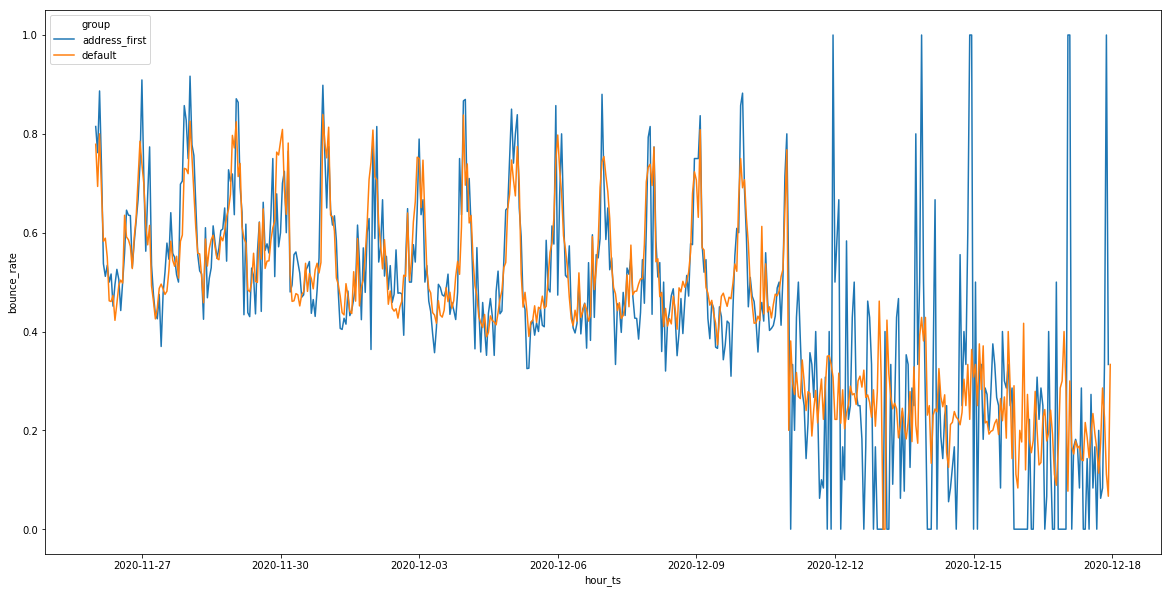

In [ ]:
sns.lineplot(data=sessions_, x='hour_ts', y='bounce_rate', hue='group', ci='cd')

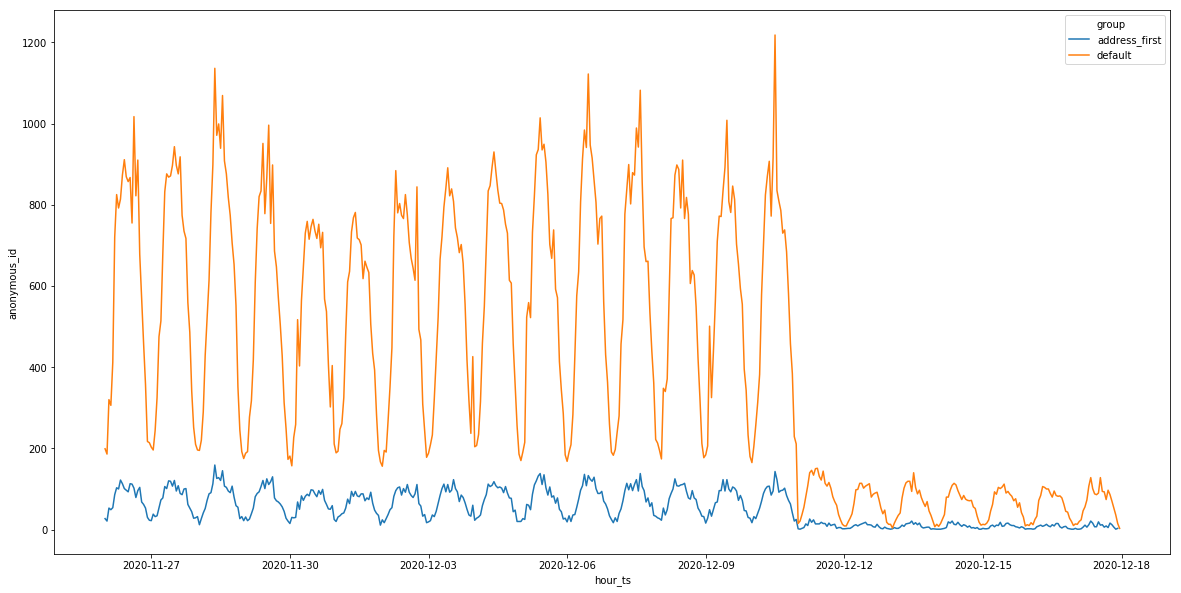

In [ ]:
sns.lineplot(data=sessions_, x='hour_ts', y='anonymous_id', hue='group')

In [ ]:
sessions_['hour_ts'] = sessions_['hour'].apply(lambda x: pd.to_datetime(x+':00:00'))

In [ ]:
sessions_['day'] = sessions_['hour'].apply(lambda x: x[:10])

In [ ]:
sessions_[sessions_['day'] < '2020-12-11'].groupby(['group']).median()

,anonymous_id,bounced,bounce_rate
group,,,
address_first,78,38,0.517278
default,637,314,0.518572


In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
mannwhitneyu(sessions_[sessions_['group']=='default']['bounce_rate'], sessions_[sessions_['group']=='address_first']['bounce_rate'])

MannwhitneyuResult(statistic=135226.5, pvalue=0.3183621440054799)

In [ ]:
mannwhitneyu(sessions_[(sessions_['group']=='default')&(sessions_['hour'] < '2020-12-11')]['bounce_rate'], sessions_[(sessions_['group']=='address_first')&(sessions_['hour'] < '2020-12-11')]['bounce_rate'])

MannwhitneyuResult(statistic=61718.5, pvalue=0.13477210463377265)

In [ ]:
mannwhitneyu(sessions_[(sessions_['group']=='default')&(sessions_['hour'] >= '2020-12-11')]['bounce_rate'], sessions_[(sessions_['group']=='address_first')&(sessions_['hour'] >= '2020-12-11')]['bounce_rate'])

MannwhitneyuResult(statistic=12456.0, pvalue=0.10763815243886782)

In [ ]:
product_add.drop_duplicates(inplace=True)

In [ ]:
product_add.describe()

,timestamp,anonymous_id
count,1150060,1150060
unique,1148607,44123
top,2020-12-08 11:43:24.023 UTC,3e5732f3-b0fb-4c1f-8bed-dd7a68994585
freq,4,1031


In [ ]:
product_add['day'] = product_add['timestamp'].apply(lambda x: x[:10])

In [ ]:
product_add['hour'] = product_add['timestamp'].apply(lambda x: x[:13])

In [ ]:
product_reduced = product_add[['day', 'hour', 'anonymous_id']].drop_duplicates()

In [ ]:
product_reduced.head()

,day,hour,anonymous_id
0,2020-12-09,2020-12-09 20,e2d50ef1-0667-4da4-88ef-ecbdd7c6a73a
1,2020-12-09,2020-12-09 19,bb5ca977-97f4-4ec8-8a71-fe206108917b
2,2020-12-09,2020-12-09 21,8e965f2b-7da0-4efb-84f5-f205956e8c30
4,2020-12-09,2020-12-09 22,8e965f2b-7da0-4efb-84f5-f205956e8c30
5,2020-12-09,2020-12-09 22,f6b363c3-4498-487b-bd00-6a04a13a6f24


In [ ]:
sessions_w_product = sessions_hourly_clean.merge(product_reduced, on=['anonymous_id', 'hour'], how='left', suffixes=('', '_product'))

In [ ]:
sessions_w_product.head()

,anonymous_id,hour,timestamp_landing,timestamp_main,retailer_id,timestamp,source,group,day,product_added
0,00001104-4c72-4f48-bb8c-ace2ded63f8b,2020-12-05 10,2,2,2,0,0,default,NaN,False
1,00007575-88d6-4acc-9940-e9ccb8358dca,2020-12-08 11,1,0,0,0,0,default,NaN,False
2,00016e45-138b-401e-9eac-78b92d48c6c4,2020-12-03 13,1,0,0,0,0,default,NaN,False
3,0001814e-5cf7-4d23-bc95-4630d9152fc1,2020-12-02 16,1,0,0,0,0,default,NaN,False
4,00021d91-c65e-4049-9ae1-7d64702c8c12,2020-12-01 08,2,2,2,0,0,default,2020-12-01,True


In [ ]:
type(sessions_w_product['day'][0])

float

In [ ]:
sessions_w_product['product_added'] = sessions_w_product['day'].notna()

In [ ]:
sessions_w_p['hour_ts'] = sessions_w_p['hour'].apply(lambda x: pd.to_datetime(x+':00:00'))

In [ ]:
sessions_w_p = sessions_w_product.groupby(['hour', 'group']).agg({'anonymous_id':'nunique', 'product_added':'sum'}).reset_index()

In [ ]:
sessions_w_p['conversion_rate'] = sessions_w_p['product_added'] / sessions_w_p['anonymous_id']

In [ ]:
mannwhitneyu(sessions_w_p[sessions_w_p['group']=='default']['conversion_rate'], sessions_w_p[sessions_w_p['group']=='address_first']['conversion_rate'])

MannwhitneyuResult(statistic=131426.0, pvalue=0.10618901573804068)

In [ ]:
mannwhitneyu(sessions_w_p[(sessions_w_p['group']=='default')&(sessions_w_p['hour'] < '2020-12-11')]['conversion_rate'], sessions_w_p[(sessions_w_p['group']=='address_first')&(sessions_w_p['hour'] < '2020-12-11')]['conversion_rate'])

MannwhitneyuResult(statistic=49275.0, pvalue=1.3221586226759172e-08)

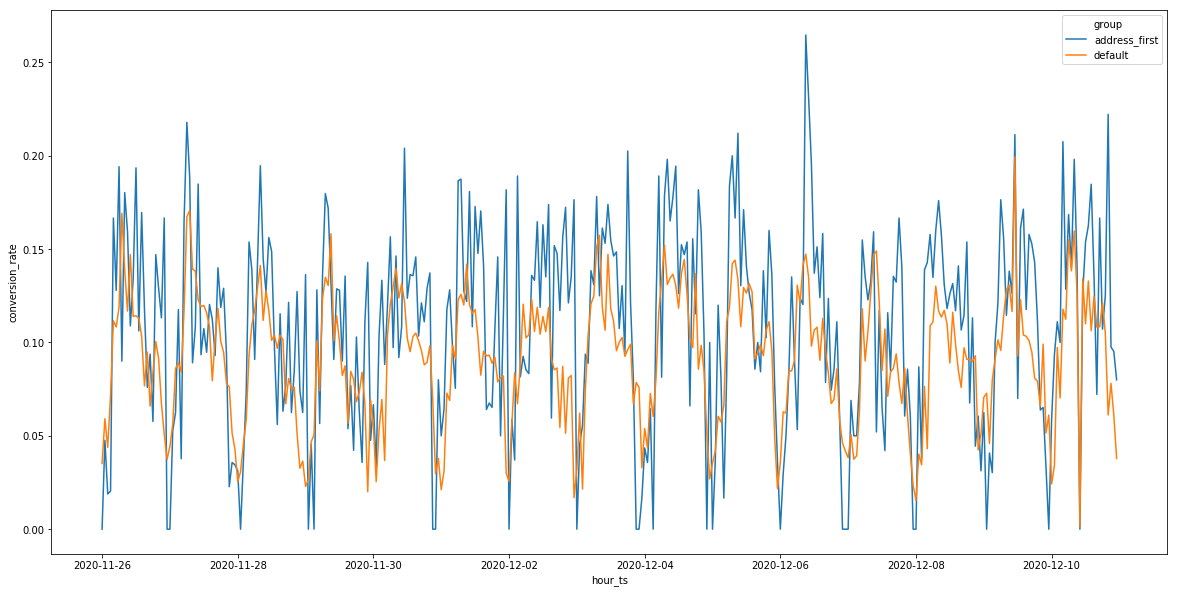

In [ ]:
sns.lineplot(data=sessions_w_p[sessions_w_p['hour'] < '2020-12-11'], x='hour_ts', y='conversion_rate', hue='group', ci='cd')